In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('inputs\OnlineRetail.csv', encoding='latin1')

data.head(-10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/2011 12:50,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/2011 12:50,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680.0,France


In [3]:
# convert string to data
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

data['Revenue'] = data['UnitPrice'] * data['Quantity']
revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

revenue


,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


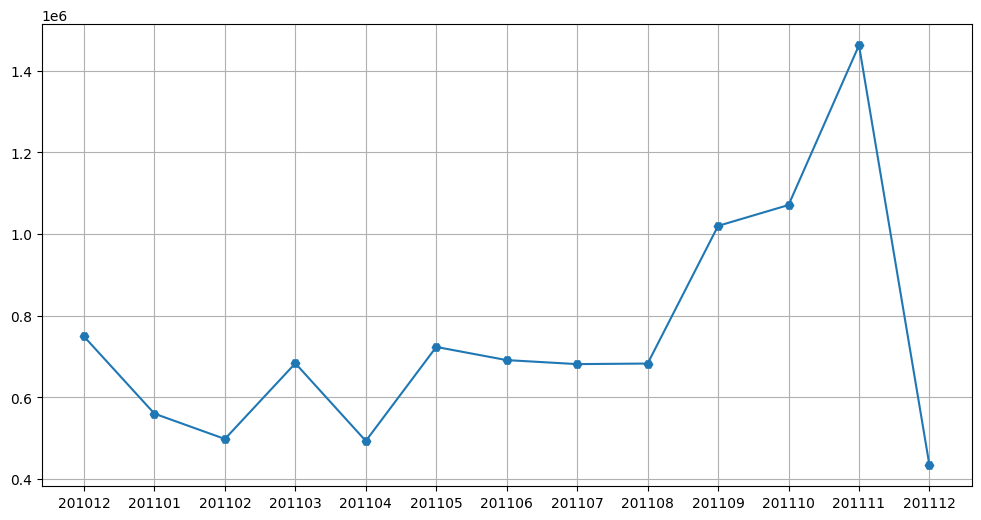

In [4]:
plt.figure(figsize=(12,6))
plt.plot(revenue['InvoiceYearMonth'].to_numpy(dtype=str), revenue['Revenue'], marker='H')

plt.grid()
plt.show()

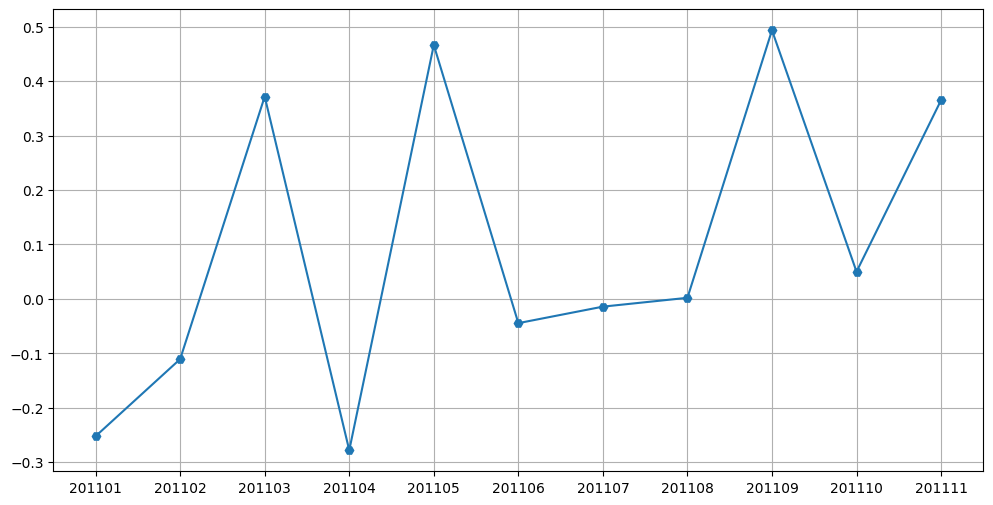

In [5]:
revenue['MonthlyGrowth'] = revenue['Revenue'].pct_change()

revenue.head()

plt.figure(figsize=(12,6))
plt.plot(revenue.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy(dtype=str),
         revenue.query('InvoiceYearMonth < 201112')['MonthlyGrowth'], marker='H')

plt.grid()
plt.show()

In [6]:
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


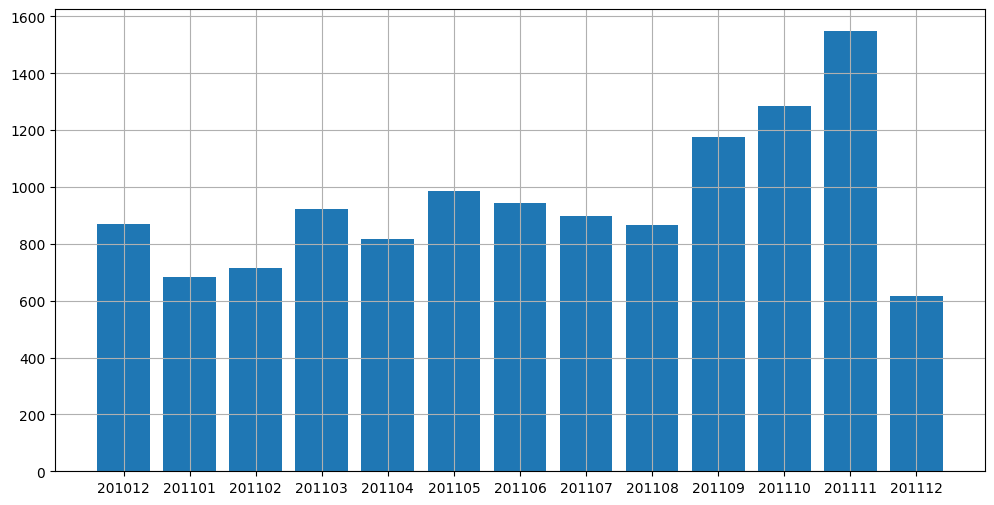

In [7]:
plt.figure(figsize=(12,6))
plt.bar(monthly_active['InvoiceYearMonth'].to_numpy(dtype=str), monthly_active['CustomerID'].to_numpy())
plt.grid()
plt.show()

In [8]:
monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

monthly_sales


,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


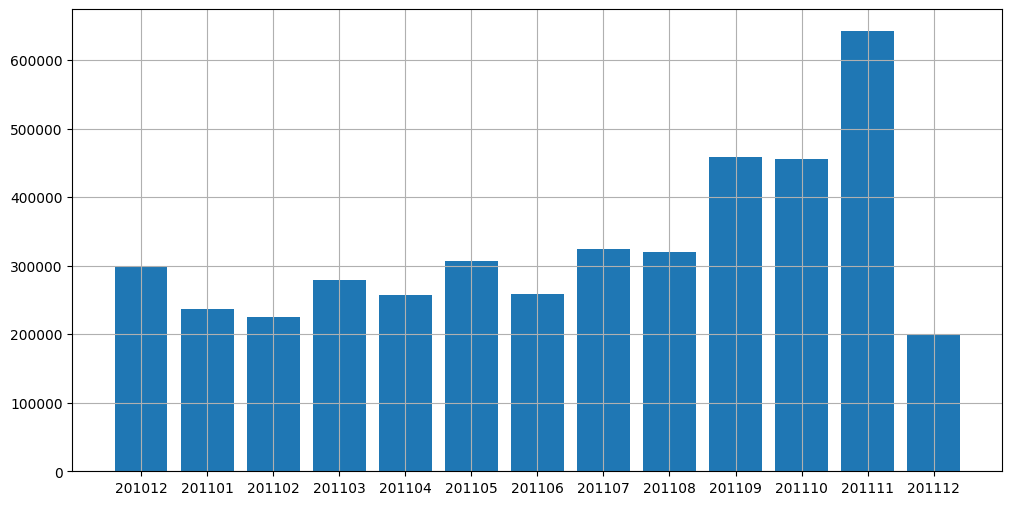

In [9]:
plt.figure(figsize=(12,6))
plt.bar(monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str), monthly_sales['Quantity'].to_numpy())
plt.grid()
plt.show()

In [10]:
monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


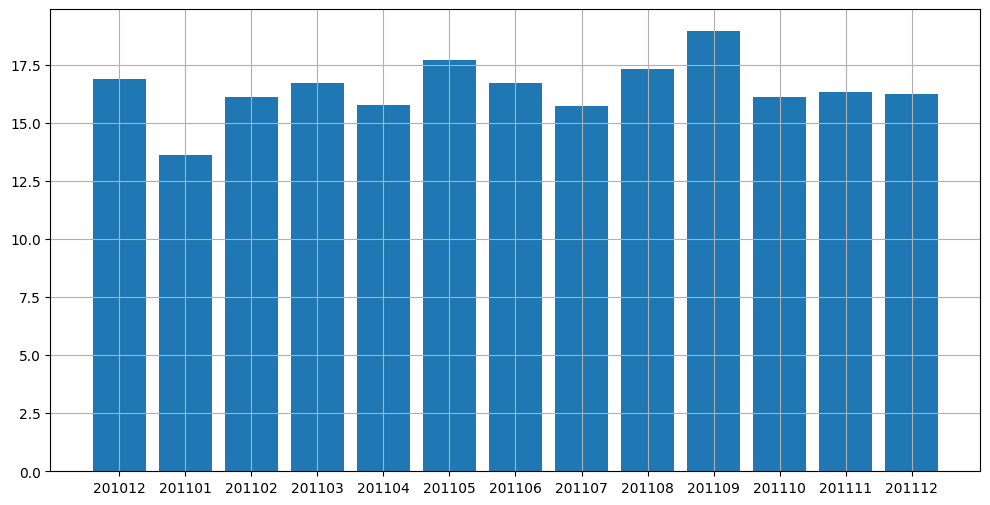

In [11]:
plt.figure(figsize=(12,6))
plt.bar(monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str), monthly_order_avg['Revenue'].to_numpy())
plt.grid()
plt.show()

In [12]:
min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns = ['CustomerID','MinPurchaseDate']
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

tx_uk = pd.merge(tx_uk, min_purchase, on='CustomerID')
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [13]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

user_type_revenue = user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

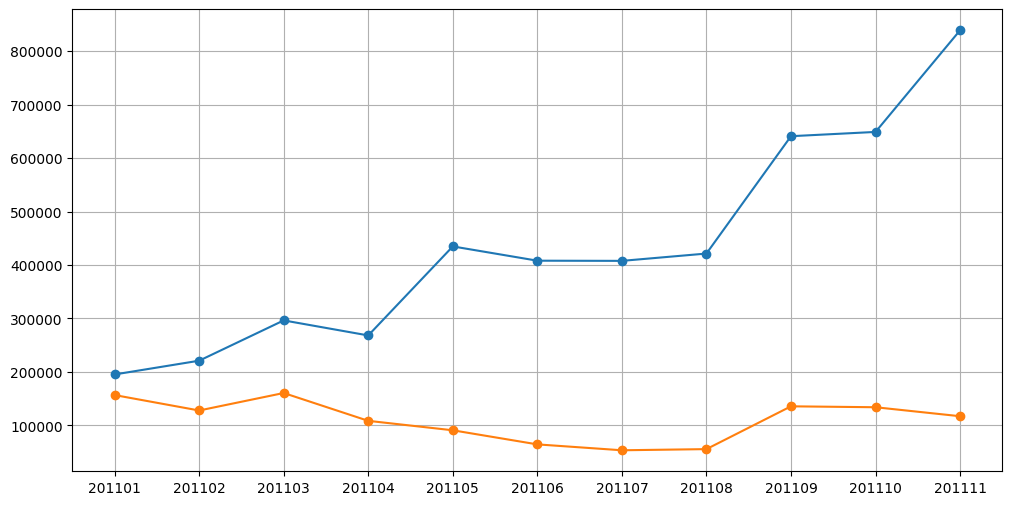

In [14]:
plt.figure(figsize=(12,6))
plt.plot(user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype=str), user_type_revenue.query("UserType == 'Existing'")['Revenue'].to_numpy(), marker='o')
plt.plot(user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype=str), user_type_revenue.query("UserType == 'New'")['Revenue'].to_numpy(), marker='o')

plt.grid()
plt.show()

In [21]:
user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
user_ratio = user_ratio.reset_index()
user_ratio = user_ratio.dropna()

user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


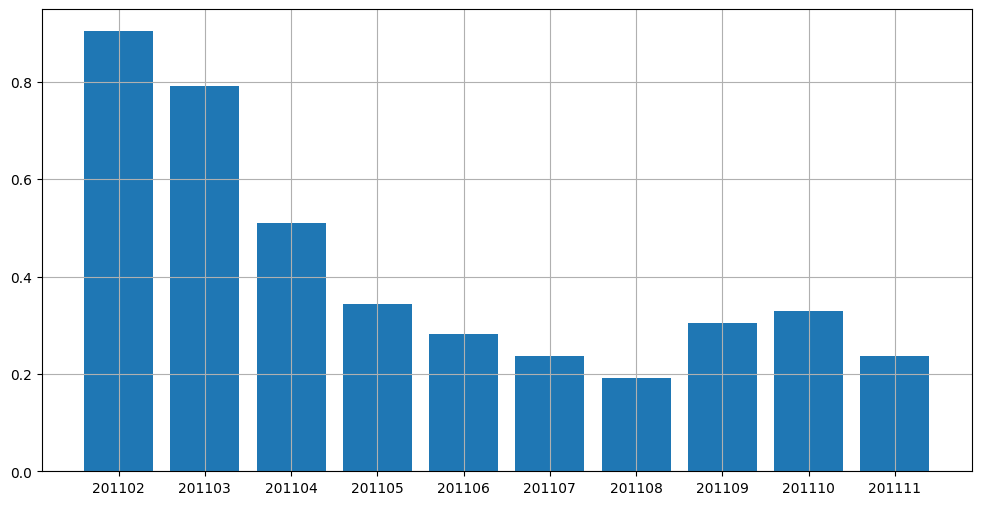

In [16]:
plt.figure(figsize=(12,6))
plt.bar(user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),
        user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'].to_numpy())
        
plt.grid()
plt.show()

In [17]:
user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

retention = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth']).reset_index()
retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [18]:
months = retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount']/retention['TotalUserCount']

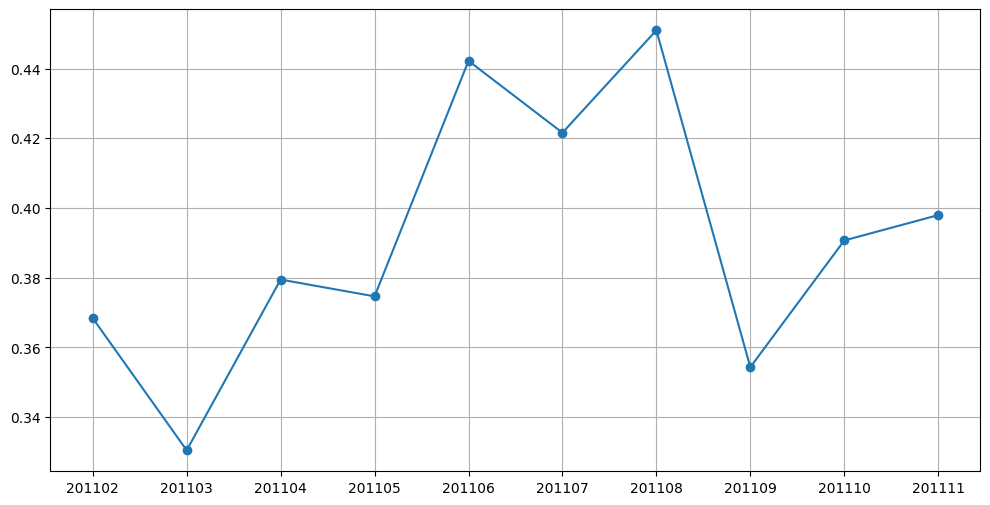

In [19]:
plt.figure(figsize=(12,6))
plt.plot(retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),
        retention.query("InvoiceYearMonth<201112")['RetentionRate'].to_numpy(), marker='o')
        
plt.grid()
plt.show()